<img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" align="right" border="0" width="35%" >

# Simple Moving Average Strategy

In [115]:
import pandas as pd
import numpy as np

%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

import yfinance as yf

In [148]:
symbols = ["AMZN","FB","AAPL"]
rawdata = yf.download(symbols, start="2010-01-01", end="2018-12-31")
rawdata = rawdata['Close']

[*********************100%***********************]  3 of 3 completed


In [149]:
ticker = "AAPL"
data = pd.DataFrame(rawdata[ticker])
data.rename(columns={ticker: 'price'}, inplace=True)
data.head()

,price
Date,
2010-01-04,30.572857
2010-01-05,30.625713
2010-01-06,30.138571
2010-01-07,30.082857
2010-01-08,30.282858


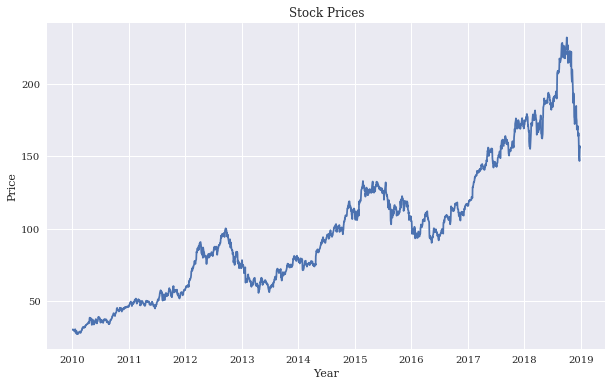

In [150]:
plt.figure(figsize=(10,6))
plt.plot(data)
plt.title('Stock Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [151]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [152]:
data.tail()

,price,SMA1,SMA2
Date,,,
2018-12-21,150.729996,187.647858,189.324564
2018-12-24,146.830002,185.840715,189.212739
2018-12-26,157.169998,184.461668,189.141945
2018-12-27,156.149994,182.946191,189.084723
2018-12-28,156.229996,181.515953,189.027699


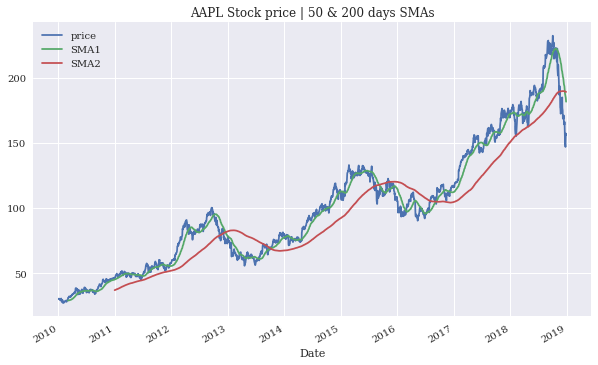

In [153]:
data.plot(title='{} Stock price | 50 & 200 days SMAs'.format(ticker),
          figsize=(10, 6));

In [154]:
data['position'] = np.where(data['SMA1'] > data['SMA2'],
                            1, -1)

In [155]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

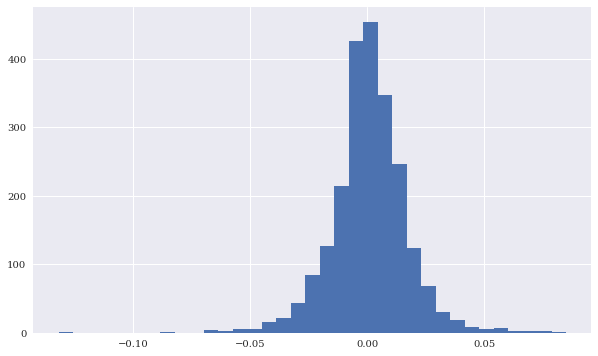

In [156]:
data['returns'].hist(bins=35, figsize=(10, 6));

In [157]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [158]:
data = data.dropna()
data.head()

,price,SMA1,SMA2,position,returns,strategy
Date,,,,,,
2010-12-31,46.080002,45.278436,37.120351,1,-0.003404,0.003404
2011-01-03,47.081429,45.347177,37.185862,1,0.021500,0.021500
2011-01-04,47.327145,45.410068,37.252137,1,0.005205,0.005205
2011-01-05,47.714287,45.463572,37.321882,1,0.008147,0.008147
2011-01-06,47.675713,45.520034,37.391695,1,-0.000809,-0.000809


In [159]:
np.exp(data[['returns', 'strategy']].sum())

returns     3.378885
strategy    4.959242
dtype: float64

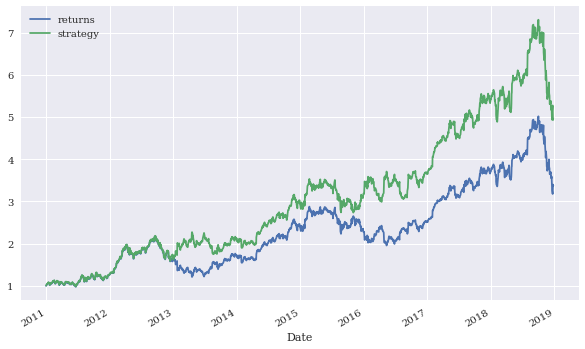

In [160]:
data[['returns', 'strategy']].dropna().cumsum(
            ).apply(np.exp).plot(figsize=(10, 6));

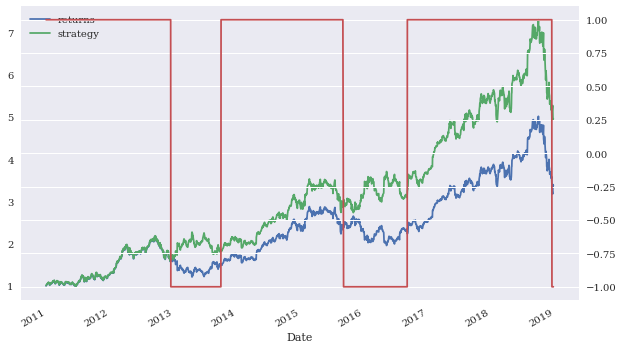

In [161]:
ax = data[['returns', 'strategy']].dropna().cumsum(
            ).apply(np.exp).plot(figsize=(10, 6))
data['position'].plot(ax=ax, secondary_y='position');

In [162]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns     0.164738
strategy    0.222080
dtype: float64

In [163]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.256095
strategy    0.255963
dtype: float64

<img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" align="right" border="0" width="35%" >